# Importazione librerie

In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Conversione files e Importazione datasets

## Convesione da `.csv` a `.parquet`

Data la grande dimensione di alcuni dei dataset utilizzati, questi verranno convertiti da `.csv` a `.parquet` (Apache Parquet Format)

In [3]:
#df = pd.read_csv('./Datasets/Dati_sensori_meteo_2021.csv', low_memory=False)
#df.to_parquet('./Datasets/Dati_sensori_meteo_2021.parquet')

Il codice sotto funziona ma riempie la RAM

In [4]:
#dtypes = {'IdSensore': 'string', 'Valore': 'string'}
#parse_dates
#meteo = pd.concat(
#    map(pd.read_parquet, [
#        f'{path}Dati_sensori_meteo_2021_parte_1.parquet',
#        f'{path}Dati_sensori_meteo_2021_parte_2.parquet'
#    ]))
#meteo.head()

Importazione datasets convertiti

In [5]:
path = './data/'

## Rilevazioni sensori metereologici 2020 e 2021

#### Attributi: 
- IdSensore: 
    - Tipologia: Testo normale
- Data: 
    - Data e ora, Marcatura oraria flessibile
- Valore: 
    - Tipologia: numero
    - Legenda: 9999 = dato mancante 888, 8888 = direzione vento variabile 777, 7777 = calma (solo per direzione di vento)
- idOperatore	
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 3: Valore massimo 4: Valore cumulato (per la pioggia)
    - Testo normale
- Stato	
    - LEGENDA: VA, VV = dato valido NA, NV, NC = dato invalido NI = dato incerto ND = dato non disponibile
    - Testo normale

In [6]:
#meteo_21 = pd.read_parquet(f'{path}/data_meteo/Dati_sensori_meteo_2021.parquet')
#meteo_21.head()

## Sensori metereologici

#### Attributi: 
- **IdSensore**
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di meteo_21
    - Testo normale
- **Tipologia**
    - Grandezza misurata
    - Testo normale
- **Unità DiMisura**
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione
    
##### Grandezze disponibili
Sono disponibili i dati delle grandezze:
- Livello Idrometrico (cm)
- Altezza neve (cm)
- Precipitazione (mm)
- Temperatura (°C)
- Umidità Relativa (%)
- Radiazione Globale (W/m2)
- Velocità e Direzione Vento (m/s e gradi).
- Velocità e direzione del vento (m/s e gradi N) raffica
NB: l’orario del dato è "ora solare" e si riferisce alle osservazioni ottenute fino all’orario indicato.

In [7]:
#sensori_meteo = pd.read_csv(f'{path}Stazioni_Meteorologiche.csv', dtype = {'Tipologia': 'category'})
#sensori_meteo.head()
#stazioni_meteo['Tipologia'].value_counts()

## Rilevazioni sensori qualità dell'aria 2020 e 2021

- Prendere qualche giorno prima e qualche giorno dopo degli anni considerati cosi da avere valori attendibili delle medie mobili agli estremi

#### Attributi: 
- **IdSensore**: 
    - Identificativo Univoco che distingue il sensore
    - Tipologia: Testo normale
- **Data**: 
    - Data e ora, Marcatura oraria flessibile
    - I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
- **Valore**: 
    - Tipologia: numero
    - LEGENDA:-9999 = dato mancante o invalido
- **idOperatore**
    - *Molto utile per capire la dimensione del dato*
    - LEGENDA: 1: Valore medio 
    - In realtà: I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.
    - Testo normale
- **Stato**	
    - VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura.
    - Testo normale

#### Caratteristiche

- La rete di rilevamento della qualità dell’aria di ARPA Lombardia è costituita da stazioni fisse che, per mezzo di analizzatori automatici, forniscono dati in continuo ad intervalli temporali regolari. 
- Le specie di inquinanti monitorate in continuo sono NOX, SO2, CO, O3, PM10, PM2.5 e benzene. A seconda del contesto ambientale nel quale è attivo il monitoraggio, diversa è la tipologia di inquinanti che è necessario rilevare. Pertanto, non tutte le stazioni sono dotate della medesima strumentazione analitica. 
- Le postazioni regionali sono distribuite su tutto il territorio regionale in funzione della densità abitativa e della tipologia di territorio rispettando i criteri definiti dal D.Lgs. 155/2010.
- **I dati forniti hanno frequenza oraria tranne PM10 e PM2.5 per i quali è fornita la media giornaliera.**

In [8]:
# Converto in importazione i -9999 in NA
aria_20 = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2020.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_20.dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [9]:
# Converto in importazione i -9999 in NA
aria_21 = pd.read_csv(f'{path}/data_aria/Dati_sensori_aria_2021.csv',
                      na_values=['-9999'],\
                      parse_dates=['Data'],\
                      dayfirst=True,\
                     )
aria_20.dtypes

IdSensore               int64
Data           datetime64[ns]
Valore                float64
Stato                  object
idOperatore             int64
dtype: object

In [10]:
aria_20_21 = pd.concat([aria_20, aria_21]).reset_index(drop=True)
aria_20_21.tail()

,IdSensore,Data,Valore,Stato,idOperatore
5246071,10331,2021-12-19 03:00:00,45.7,VA,1
5246072,10333,2021-12-24 19:00:00,39.8,VA,1
5246073,10331,2021-12-20 18:00:00,27.6,VA,1
5246074,10333,2021-12-25 11:00:00,84.7,VA,1
5246075,10331,2021-12-21 04:00:00,34.3,VA,1


## Sensori qualità dell'aria

##### Attributi: 
- IdSensore
    - Foreign Key con vincolo di integrità referenziale a `IdSensore` di aria_21
    - Testo normale
- NomeTipoSensore	
    - Grandezza misurata
    - Testo normale
- Unità DiMisura	
    - Unità di misura della grandezza
    - Testo normale
- IdStazione	
    - Numero identificativo della stazione (penso perchè ogni stazione può avere più sensori)
    - Testo normale
- NomeStazione	
    - Località della stazione (Spesso è 'Comune via' o 'Comune località)'
    - Testo normale
- Quota	
    - Altitudine
    - Numero
- Provincia
    - Sigla della provincia
    - Testo normale
- DataStart	
    - Data e ora
- DataStop	
    - Data e ora
- Storico	
    - Noto che assume valori N e S ma non capisco cosa sia
    - Testo normale
- UTM_Nord	
    - Coordinata UTM nord (le cordinate utm permettono di individuare univocamente un punto sulla cartina terrestre)
    - Testo normale
- UTM_Est	
    - Coordinata UTM est
    - Testo normale
- lng	
    - Longitudine (senza simbolo gradi)
    - Numero
- lat	
    - Latitudine (senza simbolo gradi)
    - Numero
- location	
    - (latitudine°, longitudine°)
    - Posizione

In [11]:
sensori_aria = pd.read_csv(f'{path}Stazioni_qualita_dell_aria.csv',
                           parse_dates=['DataStart', 'DataStop'])
sensori_aria.tail()

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
961,6606,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,1991-11-20,2000-01-27,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
962,6382,Ossidi di Azoto,µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,N,1993-01-11,NaT,5113078,567173,46.167967,9.870144,"(46.16796681227828, 9.87014407497457)"
963,6607,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,2000-07-09,2002-04-04,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
964,20523,Ammoniaca,µg/m³,583,Bergamo v.Meucci,249.0,BG,Bergamo,N,NaT,NaT,5059922,550116,45.691037,9.643651,"(45.69103740547214, 9.643650579461385)"
965,12597,Cadmio,ng/m³,609,Casirate d'Adda v. Cimitero,108.0,BG,Casirate d'Adda,N,2008-04-24,NaT,5038450,543458,45.498227,9.556232,"(45.49822713394494, 9.556232262351761)"


In [12]:
sensori_aria.dtypes

IdSensore                   int64
NomeTipoSensore            object
UnitaMisura                object
Idstazione                  int64
NomeStazione               object
Quota                     float64
Provincia                  object
Comune                     object
Storico                    object
DataStart          datetime64[ns]
DataStop           datetime64[ns]
Utm_Nord                    int64
UTM_Est                     int64
lat                       float64
lng                       float64
location                   object
dtype: object

## Zonizzazione

In [13]:
zonizzazione = pd.read_csv(f'{path}zonizzazione/zonizzazione_ABCD.csv')
zonizzazione.head()

,Provincia,Codice Istat,Comune,Zona,Residenti 2008,Superficie (ha)
0,BG,16009,AMBIVERE,A,2341,327
1,BG,16013,ARZAGO D'ADDA,A,2836,944
2,BG,16018,BAGNATICA,A,4119,639
3,BG,16020,BARIANO,A,4396,714
4,BG,16021,BARZANO',A,5178,356


In [14]:
zonizzazione['Zona'].value_counts()

B         448
C         423
A         406
AGG MI    107
C D       102
AGG BG     37
AGG BS     20
D           2
Name: Zona, dtype: int64

## Exploratory Data Analysis and Data Cleansing

- verificare quali siano tutte le quantità uniche rilevate dai sensori qualità dell'aria
- quali siano i gruppi di inquinanti principali
- quali siano i limiti di assunzione umana (gionralieri e annuali)
    - Vedi [qui](https://www.arpalombardia.it/Pages/Aria/Inquinanti.aspx) per limiti e piccola descrizione
    - Vedi [qui](https://www.regione.lombardia.it/wps/portal/istituzionale/HP/DettaglioRedazionale/servizi-e-informazioni/cittadini/salute-e-prevenzione/Sicurezza-negli-ambienti-di-vita-e-di-lavoro/inquinamento-atmosferico/inquinamento-atmosferico/) per approfondimento

Determino il numero di sensori per ogni tipologia

In [15]:
sensori_aria['NomeTipoSensore'].value_counts()

Biossido di Azoto             166
Ossidi di Azoto               166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Cadmio                         15
Nikel                          15
Piombo                         15
Arsenico                       15
Benzo(a)pirene                 15
Ammoniaca                      14
BlackCarbon                     4
PM10                            4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

- Si potrebbero considerare solo gli inquinanti **più importanti e con più stazioni**
- Ovvero **Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo**
- Facoltativi perchè non presenti nella valutazione della qualità dell'aria [qui](https://www.arpalombardia.it/Pages/Aria/Modellistica/Indice-qualit%C3%A0-aria.aspx): Monossido di carbonio e benzene

## Missing value e valori non validi

Voglio verificare i *dati invalidi* presenti nei due dataset dei dati

In [16]:
aria_20_21['Valore'].isna().sum()

108373

- C'é circa un 2% di NaN (c'è congruenza tra i NaN di stato e di valore)

In [17]:
aria_20_21['Stato'].value_counts(dropna = False)

VA     5137703
NaN     108373
Name: Stato, dtype: int64

## Riduzione dimensioni

Meteo: 343 stazioni con 1262 sensori

Aria: 174 stazioni con 966 sensori

Zonizzazione: 9 826 141 abitanti in 1546 comuni divisi in 7 o 8 zone

### Riduzione dimensioni `aria_20_21` (eventuale `meteo_21`)

#### Rimozione righe mancanti
- L'invalidità del dato è descritta sia dall'attributo `Stato` che dalla presenza di NaN in `Valore`
- MA (VA = dato valido NA = dato invalido I dati presenti in questo archivio relativi agli ultimi 3-6 mesi, contengono ancora valori incerti che possono subire modifiche da parte degli operatori delle reti (invalidazione manuale). Il processo di validazione dei dati prevede una fase di valutazione finale che si conclude entro il 30.3 dell’anno successivo a quello di misura)

In [18]:
#aria_20_21.dropna(subset = ['Valore', 'Stato'], inplace = True) #é meglio non farla cosi le avg possono restituire anche NaN
#aria_20_21.reset_index(drop=True, inplace=True)
aria_20_21.shape

(5246076, 5)

#### Rimozione sensori di grandezze minori
- da `stazioni_aria` e `aria_20_21` trovare solo gli `IdSensore` di tipologia utile
- Biossido di Azoto | PM10 (SM2005) e PM2,5 e/o Particolato totale | Ozono troposferico | Bisossido di Zolfo 
- Come categorie minori decido di tenere momentaneamente *Monossido di carbonio, benzene, Ossidi di Azoto e PM10*

In [19]:
sensori_aria['NomeTipoSensore'].value_counts()

Biossido di Azoto             166
Ossidi di Azoto               166
Biossido di Zolfo             125
Monossido di Carbonio         101
Ozono                          91
PM10 (SM2005)                  90
Particolato Totale Sospeso     55
Particelle sospese PM2.5       40
Benzene                        32
Cadmio                         15
Nikel                          15
Piombo                         15
Arsenico                       15
Benzo(a)pirene                 15
Ammoniaca                      14
BlackCarbon                     4
PM10                            4
Monossido di Azoto              3
Name: NomeTipoSensore, dtype: int64

In [20]:
grandezze_di_interesse = ['Biossido di Azoto',
 'PM10 (SM2005)',
 'Ossidi di Azoto',
 'Ozono',
 'Biossido di Zolfo',
 'Particolato Totale Sospeso',
 'Monossido di Carbonio',
 'Particelle sospese PM2.5',
 'Benzene']
sensori_aria.drop(sensori_aria[~sensori_aria['NomeTipoSensore'].isin(grandezze_di_interesse)].index, inplace = True)
sensori_aria.reset_index(drop=True, inplace=True)
sensori_aria

,IdSensore,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,17286,Biossido di Azoto,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-01-05,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
1,17290,PM10 (SM2005),µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-02-15,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
2,17285,Ossidi di Azoto,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-01-05,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
3,17288,Ozono,µg/m³,1374,Monza Parco,181.0,MB,Monza,N,2013-09-02,NaT,5049780,521452,45.601232,9.275073,"(45.60123219955139, 9.27507265782848)"
4,10112,Ozono,µg/m³,698,Ceneselli v. Moro,13.0,RO,Ceneselli,S,2006-11-28,2017-01-01,4987161,686934,45.013257,11.372345,"(45.01325676849334, 11.372344948058235)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,6288,Ossidi di Azoto,µg/m³,551,Arconate v. De Gasperi,182.0,MI,Arconate,N,1999-01-20,NaT,5043898,488082,45.548517,8.847322,"(45.54851735741946, 8.847321929216262)"
862,6614,Particolato Totale Sospeso,µg/m³,584,Bergamo v.Garibaldi,249.0,BG,Bergamo,S,1994-06-15,2005-10-21,5060449,551482,45.695680,9.661249,"(45.69568034432694, 9.66124914606551)"
863,6606,Particolato Totale Sospeso,µg/m³,591,Seriate v. Garibaldi,256.0,BG,Seriate,S,1991-11-20,2000-01-27,5059449,555672,45.686356,9.714948,"(45.68635606439914, 9.714947917631529)"
864,6382,Ossidi di Azoto,µg/m³,569,Sondrio v.Mazzini,307.0,SO,Sondrio,N,1993-01-11,NaT,5113078,567173,46.167967,9.870144,"(46.16796681227828, 9.87014407497457)"


#### Rimozione righe con idoperatore assurdo

In [21]:
aria_20_21.value_counts('idOperatore')

idOperatore
1        5246075
15504          1
dtype: int64

In [22]:
aria_20_21.drop(aria_20_21[aria_20_21.idOperatore == 15504].index, inplace=True)
aria_20_21.reset_index(drop=True, inplace=True)

# Data preparation

## Grouping e calcolo grandezze aggegate (GROUP by per id_sensore e giorno)

- Raggruppo per `IdSensore` e `Data`(giorno)
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore` registrato dal senbsore
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti


In [23]:
aria__id_day = aria_20_21[['IdSensore', 'Data', 'Valore']]\
               .groupby(['IdSensore', aria_20_21['Data'].dt.date])\
               .agg({'Valore': ['mean', 'count', 'std']})\
               .reset_index()

aria__id_day.columns = ['IdSensore', 'Data', 'Valore_MEAN_id_day', 'Valore_COUNT_id_day', 'Valore_STD_id_day']
aria__id_day

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day
0,5504,2020-01-01,107.595833,24,20.571624
1,5504,2020-01-02,79.170833,24,20.404613
2,5504,2020-01-03,72.254167,24,9.209729
3,5504,2020-01-04,55.854167,24,11.673343
4,5504,2020-01-05,68.937500,24,13.724171
...,...,...,...,...,...
313943,30166,2021-12-23,3.600000,1,NaN
313944,30166,2021-12-24,3.100000,1,NaN
313945,30166,2021-12-25,3.300000,1,NaN
313946,30166,2021-12-26,3.100000,1,NaN


## Quali  medie sono significative ?

Cerco di determinare quali medie sensore/giorno, siano significative, quindi siano ottenute da un numero sufficiente di misurazioni
- Per prima cosa verifico il numero di di medie giornaliere per sensore ottenute dal **numero massimo di misurazioni (24**, una misurazione ogni ora)

In [24]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 24].shape[0]

200009

- Ora verifico quante di queste siano ottenute da un **solo valore**
    - Queste potrebbero avere senso, perchè alcune misurazioni sono fornite dai sensori già mediate sull'intera giornata (o almeno dovrebbero)
    - Come PM2.5 e PM10
- Per questo per ora direi di non toglierle, valutiamo bene la casistica una volta effettuato il join con il dataset delle stazioni

In [25]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 1].shape[0]

93813

- Verifico quali medie sono ottenute da **meno di 7 misurazioni** ma **piú di 1 misurazione**
    - Secondo me 7 ore, anche se fossero di fila e non sparse, è un dato ottimo. UNa concentrazione più o meno stabile di inquinante per 7 ore è significativa.
    - Inoltre con 7 osservazioni penso che eventuali outliers vengano abbastanza spenti in media, comunque l’effetto non è troppo diverso da averne 15 in termini di effetto degli outliers,

In [26]:
aria__id_day[(aria__id_day.Valore_COUNT_id_day < 7) & (aria__id_day.Valore_COUNT_id_day > 1)].shape[0]

311

- Verifico quali medie sono ottenute da **meno di 15 misurazioni** ma **piú di 1 misurazione** (considero un cutoff significativo)

In [27]:
aria__id_day[(aria__id_day.Valore_COUNT_id_day < 15) & (aria__id_day.Valore_COUNT_id_day > 1)].shape[0]

3425

- Verifico quali sono ottenute da 0 osservazioni

In [28]:
aria__id_day[aria__id_day.Valore_COUNT_id_day == 0].shape[0]

7201

#### Rimozione medie ottenute da meno di 7 osservazioni

In [29]:
aria__id_day.drop(aria__id_day[(aria__id_day.Valore_COUNT_id_day < 7) & (aria__id_day.Valore_COUNT_id_day > 1)].index, inplace=True)
aria__id_day.reset_index(drop=True, inplace=True)

## JOIN (aria, sensori)

Inner join tra `aria__id_day` e `sensori_aria` a dare `aria_sensori__id_day`

In [30]:
aria_sensori__id_day = pd.merge(aria__id_day, sensori_aria, how = 'inner', on = 'IdSensore')
aria_sensori__id_day

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,5504,2020-01-01,107.595833,24,20.571624,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
1,5504,2020-01-02,79.170833,24,20.404613,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
2,5504,2020-01-03,72.254167,24,9.209729,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
3,5504,2020-01-04,55.854167,24,11.673343,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
4,5504,2020-01-05,68.937500,24,13.724171,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300978,30166,2021-12-23,3.600000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300979,30166,2021-12-24,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300980,30166,2021-12-25,3.300000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
300981,30166,2021-12-26,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"


#### Perchè si perdono delle medie facendo il JOIN ?
Si passa da 314000 a 301000 righe circa dopo il merge, questo è dovuto al fatto che:
- Praticamente ci sono **88 sensori** che compaiono solo in **aria_20_21 ma non sono registrati** in **sensori_aria** (controllato manualente)
- Nel join quindi **PERDIAMO CIRCA 13000 medie**

In [31]:
# Numero di sensori che non compaiono in sensori_aria
print(len(aria_20_21[~aria_20_21.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()))
lista = aria_20_21[~aria_20_21.IdSensore.isin(sensori_aria.IdSensore)]['IdSensore'].unique()
# Numero di righe di aria__id_day relative a quei sensori
print(aria__id_day[aria__id_day.IdSensore.isin(lista)].shape[0])
# Numero di righe perse nel join 
print(aria__id_day.shape[0] - aria_sensori__id_day.shape[0])

88
12654
12654


#### Verifica significato MEDIE ottenuti da UNA SOLA MISURAZIONE (93000 su 313948)

In [32]:
print(aria_sensori__id_day.value_counts('NomeTipoSensore'), '\n')
print(aria_sensori__id_day[(aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore'))

NomeTipoSensore
Biossido di Azoto           61355
Ossidi di Azoto             60623
PM10 (SM2005)               45757
Ozono                       36881
Monossido di Carbonio       32325
Biossido di Zolfo           23920
Particelle sospese PM2.5    23294
Benzene                     16828
dtype: int64 

NomeTipoSensore
PM10 (SM2005)               44765
Particelle sospese PM2.5    22414
Benzene                     15689
Biossido di Azoto             520
Ossidi di Azoto               489
Ozono                         287
Monossido di Carbonio         237
Biossido di Zolfo             155
dtype: int64


**67000 di queste sono PM10 e PM2.5**
- giustificate dal fatto che sono già fornite in quanto medie (ecco perchè solo una misurazione !)
- Non le elimino

In [33]:
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore'))
print(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore == 'PM10 (SM2005)')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particolato Totale Sospeso')
    | (aria_sensori__id_day.NomeTipoSensore == 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].shape)

NomeTipoSensore
PM10 (SM2005)               44765
Particelle sospese PM2.5    22414
dtype: int64
(67179, 20)


#### Quali medie non sono relative al particolato ma comunque hanno una sola misurazione ? Perchè ?
- Quasi tutte le misurazioni del benzene (15689 su 16828) son oda una misurazione, deduco anche qui allora che sia un valore mediato

In [34]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5')) & (aria_sensori__id_day.Valore_COUNT_id_day == 1)].value_counts('NomeTipoSensore')

NomeTipoSensore
Benzene                  15689
Biossido di Azoto          520
Ossidi di Azoto            489
Ozono                      287
Monossido di Carbonio      237
Biossido di Zolfo          155
dtype: int64

In [35]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5'))].value_counts('NomeTipoSensore')

NomeTipoSensore
Biossido di Azoto        61355
Ossidi di Azoto          60623
Ozono                    36881
Monossido di Carbonio    32325
Biossido di Zolfo        23920
Benzene                  16828
dtype: int64

#### Mentre per le altre grandezze sembrano effettivamente errori, queste le RIMUOVO
    - Un totale di 1688 righe

In [36]:
aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5')
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].shape[0]

1688

In [37]:
aria_sensori__id_day.drop(aria_sensori__id_day[
    ((aria_sensori__id_day.NomeTipoSensore != 'PM10 (SM2005)')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particolato Totale Sospeso')
    & (aria_sensori__id_day.NomeTipoSensore != 'Particelle sospese PM2.5') 
    & (aria_sensori__id_day.NomeTipoSensore != 'Benzene') & (aria_sensori__id_day.Valore_COUNT_id_day == 1))].index, inplace=True)
aria_sensori__id_day.reset_index(drop=True, inplace=True)
aria_sensori__id_day

,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,Quota,Provincia,Comune,Storico,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location
0,5504,2020-01-01,107.595833,24,20.571624,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
1,5504,2020-01-02,79.170833,24,20.404613,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
2,5504,2020-01-03,72.254167,24,9.209729,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
3,5504,2020-01-04,55.854167,24,11.673343,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
4,5504,2020-01-05,68.937500,24,13.724171,Biossido di Azoto,µg/m³,501,Milano v.Marche,129.0,MI,Milano,N,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299290,30166,2021-12-23,3.600000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
299291,30166,2021-12-24,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
299292,30166,2021-12-25,3.300000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"
299293,30166,2021-12-26,3.100000,1,NaN,Benzene,µg/m³,652,Brescia v.Turati,154.0,BS,Brescia,N,2016-01-01,NaT,5043626,596168,45.539529,10.231786,"(45.539529434955995, 10.231785907477223)"


#### Verifico che ci sia solo un'unitá di misura per ogni tipo di sensore e creo df `unita_misura`

In [38]:
lista_tipi = aria_sensori__id_day.NomeTipoSensore.unique()
for tipo in lista_tipi:
    unita = aria_sensori__id_day[aria_sensori__id_day['NomeTipoSensore'] == tipo]['UnitaMisura'].unique()
    print(unita, tipo)
    
    if len(unita) > 1:  #blocco di controllo
        raise ValueError('ERROR: ci sono piú unita di misura per un inquinante')

['µg/m³'] Biossido di Azoto
['µg/m³'] Biossido di Zolfo
['µg/m³'] Ozono
['mg/m³'] Monossido di Carbonio
['µg/m³'] Benzene
['µg/m³'] Ossidi di Azoto
['µg/m³'] PM10 (SM2005)
['µg/m³'] Particelle sospese PM2.5


In [39]:
unita_misura = pd.DataFrame([[tipo, aria_sensori__id_day[aria_sensori__id_day['NomeTipoSensore'] == tipo]['UnitaMisura'].unique()[0]] for tipo in lista_tipi], columns=["NomeTipoSensore", "UnitaMisura"])
unita_misura

,NomeTipoSensore,UnitaMisura
0,Biossido di Azoto,µg/m³
1,Biossido di Zolfo,µg/m³
2,Ozono,µg/m³
3,Monossido di Carbonio,mg/m³
4,Benzene,µg/m³
5,Ossidi di Azoto,µg/m³
6,PM10 (SM2005),µg/m³
7,Particelle sospese PM2.5,µg/m³


#### Verifico il numero sensori con `DataStart` dopo il `2019-12-31` e li rimuovo (edited)

In [40]:
#sum(aria_sensori__id_day['DataStart'] > '2019-12-31')

In [41]:
#aria_sensori__id_day = aria_sensori__id_day.drop(aria_sensori__id_day[aria_sensori__id_day['DataStart'] > '2019-12-31'].index)
#aria_sensori__id_day.reset_index(drop=True, inplace=True)

Numero sensori con `DataStop` diversa da NA

In [42]:
#sum(~aria_sensori__id_day['DataStop'].isna())

## JOIN con zonizzazione

- Inner joint tra `aria_sensori__id_day` e `zonizzazione` a dare `aria_sensori_zone__id_day`
- Non perdo nessuna riga con l'inner joint perché sono presenti tutti i comuni nel dataset `zonizzazione`

In [43]:
aria_sensori_zone__id_day = pd.merge(aria_sensori__id_day, zonizzazione[['Zona', 'Residenti 2008', 'Superficie (ha)']], left_on = aria_sensori__id_day['Comune'].str.lower(), right_on = zonizzazione['Comune'].str.lower())
aria_sensori_zone__id_day

,key_0,IdSensore,Data,Valore_MEAN_id_day,Valore_COUNT_id_day,Valore_STD_id_day,NomeTipoSensore,UnitaMisura,Idstazione,NomeStazione,...,DataStart,DataStop,Utm_Nord,UTM_Est,lat,lng,location,Zona,Residenti 2008,Superficie (ha)
0,milano,5504,2020-01-01,107.595833,24,20.571624,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",AGG MI,1307495,18175
1,milano,5504,2020-01-02,79.170833,24,20.404613,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",AGG MI,1307495,18175
2,milano,5504,2020-01-03,72.254167,24,9.209729,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",AGG MI,1307495,18175
3,milano,5504,2020-01-04,55.854167,24,11.673343,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",AGG MI,1307495,18175
4,milano,5504,2020-01-05,68.937500,24,13.724171,Biossido di Azoto,µg/m³,501,Milano v.Marche,...,1980-09-18,NaT,5038105,514918,45.496316,9.190934,"(45.49631644365102, 9.190933555313624)",AGG MI,1307495,18175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299290,mezzana bigli,20216,2021-12-21,2.995833,24,0.760709,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,2006-01-20,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",B,1144,1872
299291,mezzana bigli,20216,2021-12-22,1.729167,24,0.393953,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,2006-01-20,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",B,1144,1872
299292,mezzana bigli,20216,2021-12-23,2.329167,24,0.591593,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,2006-01-20,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",B,1144,1872
299293,mezzana bigli,20216,2021-12-24,0.976923,13,0.527816,Biossido di Zolfo,µg/m³,690,Mezzana Bigli loc. Casoni,...,2006-01-20,NaT,4990697,489679,45.069659,8.868889,"(45.069658641385914, 8.86888929943922)",B,1144,1872


In [44]:
aria_sensori_zone__id_day['Zona'].value_counts()

A         101798
AGG MI     62281
B          60247
AGG BG     22956
AGG BS     19254
C          17124
C D        15635
Name: Zona, dtype: int64

L'attributo `quota` delle stazioni in 'C D' indica che si trovano nel fondovalle quindi associo queste stazioni alla zona D

In [45]:
aria_sensori_zone__id_day['Zona'].replace('C D', 'D', inplace = True)

In [46]:
aria_sensori_zone__id_day['Zona'].value_counts()

A         101798
AGG MI     62281
B          60247
AGG BG     22956
AGG BS     19254
C          17124
D          15635
Name: Zona, dtype: int64

## Grouping e calcolo grandezze aggegate (GROUP by per Data, Zona e NomeTipoSensore)

- Raggruppo per `Data` (giorno), `Zona`, `NomeTipoSensore`
- Calcolo grandezze aggregate
    - Calcolo il valore medio e la deviazione standard del `Valore_MEAN_id_day`, cioé il valore mediato di un sensore sull'intera giornata
    - Importante sottolineare che le funzioni `mean, count e std` di pandas NON tengono conto dei Na, quindi i valori che vediamo sono esatti
- Si perdono le colonne `Valore_COUNT_id_day` e `Valore_STD_id_day` ma non sono importanti, sono piú importanti quelle che ricalcoliamo (chiamate `Valore_COUNT_day_zona_tipo` e `Valore_STD_day_zona_tipo`)

In [47]:
aria_sensori_zone__day_zona_tipo = aria_sensori_zone__id_day.groupby([
    'Data',
    'Zona',
    'NomeTipoSensore'
]).agg({
    'Valore_MEAN_id_day': ['mean', 'count', 'std']
}).reset_index()

aria_sensori_zone__day_zona_tipo.columns = ['Data', 'Zona', 'NomeTipoSensore', 'Valore_MEAN_day_zona_tipo', 'Valore_COUNT_day_zona_tipo', 'Valore_STD_day_zona_tipo']
aria_sensori_zone__day_zona_tipo

,Data,Zona,NomeTipoSensore,Valore_MEAN_day_zona_tipo,Valore_COUNT_day_zona_tipo,Valore_STD_day_zona_tipo
0,2020-01-01,A,Benzene,1.888889,9,0.964941
1,2020-01-01,A,Biossido di Azoto,41.363580,27,8.871595
2,2020-01-01,A,Biossido di Zolfo,2.647024,14,1.138938
3,2020-01-01,A,Monossido di Carbonio,1.178611,15,0.370830
4,2020-01-01,A,Ossidi di Azoto,101.363117,27,41.988203
...,...,...,...,...,...,...
40550,2021-12-28,AGG BS,Benzene,1.500000,1,NaN
40551,2021-12-28,AGG BS,Ozono,0.042857,1,NaN
40552,2021-12-28,B,Biossido di Zolfo,NaN,0,NaN
40553,2021-12-28,B,Ozono,NaN,0,NaN


## Controllo valori mancanti nelle medie giornaliere per zona e tipo

I valori delle medie mancanti sono dovuti a:

- righe effettivamente mancanti
- righe con Valore_MEAN uguale a NaN

In [48]:
lista_date = pd.date_range(aria_sensori_zone__day_zona_tipo.Data.min(), aria_sensori_zone__day_zona_tipo.Data.max())
lista_zone = aria_sensori_zone__day_zona_tipo.Zona.unique()
lista_tipi = aria_sensori_zone__day_zona_tipo.NomeTipoSensore.unique()

print(len(lista_date) * len(lista_zone) * len(lista_tipi),'Numero righe teoriche -') #giori * zone * tipi sensori
print(len(aria_sensori_zone__day_zona_tipo),'Numero righe reali    =')
print(len(lista_date) * len(lista_zone) * len(lista_tipi)-len(aria_sensori_zone__day_zona_tipo),'  Numero righe mancanti')

40768 Numero righe teoriche -
40555 Numero righe reali    =
213   Numero righe mancanti


In [49]:
print(sum(aria_sensori_zone__day_zona_tipo['Valore_MEAN_day_zona_tipo'].isna()), 'Numero righe con valore NaN')

110 Numero righe con valore NaN


#### Aggiungo i NaN  nei giorni mancanti per ogni coppia `Zona` e `NomeTipoSensore`

Serve dopo quando si compie la media mobile (per mediare i giorni contigui e non le righe contigue)

In [50]:
colonne = ['Data', 'Zona', 'NomeTipoSensore']
idx = pd.MultiIndex.from_product([lista_date, lista_zone, lista_tipi], names=colonne)

aria_sensori_zone__day_zona_tipo = aria_sensori_zone__day_zona_tipo.set_index(colonne).reindex(idx, fill_value=np.NaN).reset_index()
aria_sensori_zone__day_zona_tipo

,Data,Zona,NomeTipoSensore,Valore_MEAN_day_zona_tipo,Valore_COUNT_day_zona_tipo,Valore_STD_day_zona_tipo
0,2020-01-01,A,Benzene,1.888889,9.0,0.964941
1,2020-01-01,A,Biossido di Azoto,41.363580,27.0,8.871595
2,2020-01-01,A,Biossido di Zolfo,2.647024,14.0,1.138938
3,2020-01-01,A,Monossido di Carbonio,1.178611,15.0,0.370830
4,2020-01-01,A,Ossidi di Azoto,101.363117,27.0,41.988203
...,...,...,...,...,...,...
40763,2021-12-28,D,Monossido di Carbonio,NaN,NaN,NaN
40764,2021-12-28,D,Ossidi di Azoto,NaN,NaN,NaN
40765,2021-12-28,D,Ozono,NaN,NaN,NaN
40766,2021-12-28,D,PM10 (SM2005),NaN,NaN,NaN


Abbiamo ottenuto un numero di righe uguale a quelle teoriche con presenti dei NaN

In [51]:
print(sum(aria_sensori_zone__day_zona_tipo['Valore_MEAN_day_zona_tipo'].isna()), 'Numero totale di valori medi mancanti')

323 Numero totale di valori medi mancanti


### Numero medio sensori e numero valori mancanti per ogni coppia `Zona` - `NomeTipoSensore`

<AxesSubplot:xlabel='Zona', ylabel='NomeTipoSensore'>

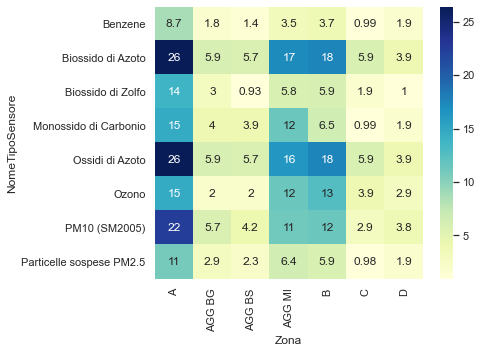

In [52]:
controllo = aria_sensori_zone__day_zona_tipo.groupby(['Zona', 'NomeTipoSensore'], as_index = False)[['Valore_COUNT_day_zona_tipo']].mean()
controllo = controllo.pivot('NomeTipoSensore', 'Zona', 'Valore_COUNT_day_zona_tipo')

sns.set(rc={'figure.figsize':(6,5)})
sns.heatmap(controllo, annot=True, cmap="YlGnBu")

- Ora valuto il numero di osservazioni per ogni coppia `NomeTipoSensore` - `Zona`.
- Con il dataset aggiornato dovrebbe risultare per tutte le coppie 365gg x numero anni + 1gg(bisestile il 2020)

<AxesSubplot:xlabel='Zona', ylabel='NomeTipoSensore'>

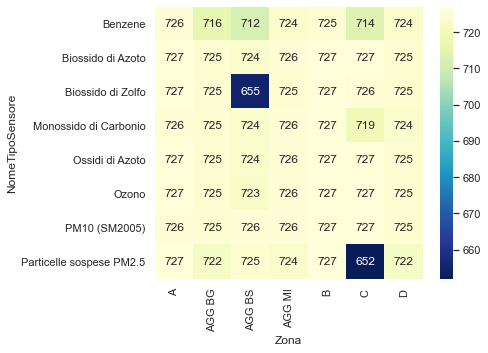

In [53]:
controllo1 = aria_sensori_zone__day_zona_tipo.groupby(['Zona', 'NomeTipoSensore'], as_index = False)[['Valore_MEAN_day_zona_tipo']].count()
controllo1 = controllo1.pivot('NomeTipoSensore', 'Zona', 'Valore_MEAN_day_zona_tipo')

sns.heatmap(controllo1, annot=True, fmt="d", cmap="YlGnBu_r")

### Valori mancanti per ogni coppia `Data` - `NomeTipoSensore`

Il grafico é commentato perché é un po' pesante

In [54]:
controllo2 = aria_sensori_zone__day_zona_tipo.groupby(['NomeTipoSensore', 'Data'], as_index = False)[['Valore_MEAN_day_zona_tipo']].count()
controllo2 = controllo2.pivot('NomeTipoSensore', 'Data', 'Valore_MEAN_day_zona_tipo')

#sns.set(rc={'figure.figsize':(17,5)})
#sns.heatmap(controllo2, cmap="YlGnBu_r", vmin=6, vmax=7)

## Media mobile

- In fase di lettura dei csv prendere qualche giorno prima e qualche giorno dopo degli anni considerati cosi da avere valori attendibili agli estremi!! (in fase di importazione)
- La calcolo su 7 e su 21 giorni
- Setto il parametro del numero minimo di valori da avere per calcolare la media (3 per media 7gg e 10 per media 21gg)

In [55]:
ROLL_WINDOW1 = 7   #media mobile 7 giorni
ROLL_WINDOW2 = 21  #media mobile 21 giorni

new_col1 = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con le medie
new_col2 = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con le medie

for zona in lista_zone:
    for tipo in lista_tipi:

        temp1 = aria_sensori_zone__day_zona_tipo[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == tipo) & (aria_sensori_zone__day_zona_tipo['Zona'] == zona)]['Valore_MEAN_day_zona_tipo']\
                .rolling(window=ROLL_WINDOW1, center = True, min_periods = 3)\
                .mean()
        temp2 = aria_sensori_zone__day_zona_tipo[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == tipo) & (aria_sensori_zone__day_zona_tipo['Zona'] == zona)]['Valore_MEAN_day_zona_tipo']\
                .rolling(window=ROLL_WINDOW2, center = True, min_periods = 10)\
                .mean()
        new_col1 = new_col1.append(temp1)
        new_col2 = new_col2.append(temp2)
        
aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, new_col1.rename('Valore_ROLLMEAN7_day_zona_tipo'), left_index=True, right_index=True)
aria_sensori_zone__day_zona_tipo = pd.merge(aria_sensori_zone__day_zona_tipo, new_col2.rename('Valore_ROLLMEAN21_day_zona_tipo'), left_index=True, right_index=True)

Stampo una coppia `NomeTipoSensore` e `Zona` specifica come esempio

In [56]:
aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')].head()

,Data,Zona,NomeTipoSensore,Valore_MEAN_day_zona_tipo,Valore_COUNT_day_zona_tipo,Valore_STD_day_zona_tipo,Valore_ROLLMEAN7_day_zona_tipo,Valore_ROLLMEAN21_day_zona_tipo
6,2020-01-01,A,PM10 (SM2005),77.681818,22.0,25.302713,61.659585,53.516529
62,2020-01-02,A,PM10 (SM2005),62.043478,23.0,20.184328,57.658103,52.915514
118,2020-01-03,A,PM10 (SM2005),59.652174,23.0,17.517806,55.186100,53.584220
174,2020-01-04,A,PM10 (SM2005),47.260870,23.0,13.325360,54.352061,54.630152
230,2020-01-05,A,PM10 (SM2005),41.652174,23.0,14.398891,49.950311,56.927273


- Risolve quasi completamente il problema di qualche media mancante

In [57]:
print(sum(aria_sensori_zone__day_zona_tipo.Valore_MEAN_day_zona_tipo.isna()), 'Valori mancanti media giornaliera')
print(sum(aria_sensori_zone__day_zona_tipo.Valore_ROLLMEAN7_day_zona_tipo.isna()), ' Valori mancanti media mobile 7gg')
print(sum(aria_sensori_zone__day_zona_tipo.Valore_ROLLMEAN21_day_zona_tipo.isna()), ' Valori mancanti media mobile 21gg')

323 Valori mancanti media giornaliera
51  Valori mancanti media mobile 7gg
20  Valori mancanti media mobile 21gg


#### Plot esempio con media giornaliera, media mobile 7gg e media mobile 21gg (PM10 zona A)

<AxesSubplot:xlabel='Data', ylabel='Valore_MEAN_day_zona_tipo'>

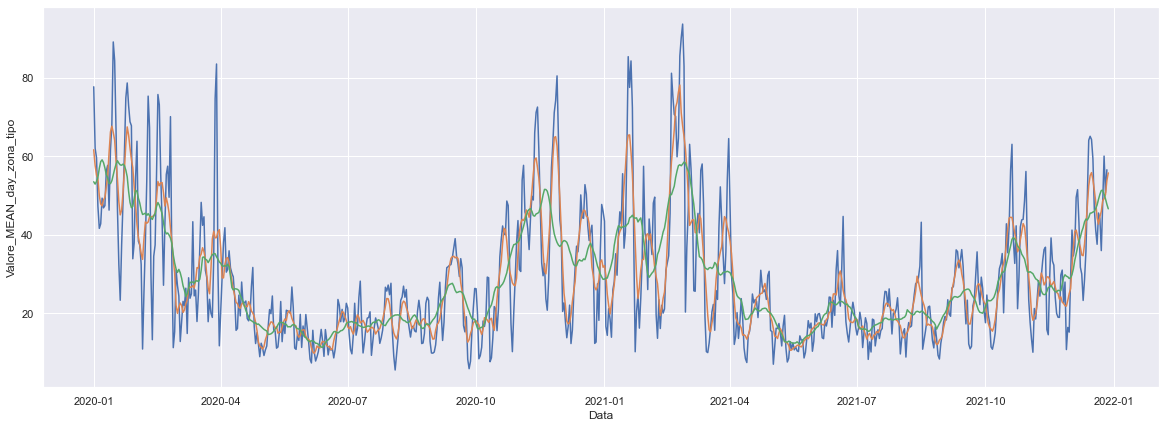

In [58]:
sns.set(rc={'figure.figsize':(20,7)})
sns.lineplot(x="Data", y='Valore_MEAN_day_zona_tipo', data=aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')])
sns.lineplot(x="Data", y='Valore_ROLLMEAN7_day_zona_tipo', data=aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')])
sns.lineplot(x="Data", y='Valore_ROLLMEAN21_day_zona_tipo', data=aria_sensori_zone__day_zona_tipo.loc[(aria_sensori_zone__day_zona_tipo['NomeTipoSensore'] == 'PM10 (SM2005)') & (aria_sensori_zone__day_zona_tipo['Zona'] == 'A')])

La media sui 21 giorni é eccessiva perché genera degli andamenti che non sono presenti nei dati

## Scalare grandezze rispetto alla soglia per renderle confrontabili

#### Limiti del sito ARPA Lombardia (WHO 2005)

É un mix tra massimi su medie orarie, 8 ore, giornaliere e annuali

In [59]:
limitiARPA_vari = pd.DataFrame({'Benzene': np.NaN,
                            'Biossido di Azoto': 200,
                            'Biossido di Zolfo': 350,
                            'Monossido di Carbonio': np.NaN,
                            'Ossidi di Azoto': np.NaN,
                            'Ozono': 180,
                            'PM10 (SM2005)': 50,
                            'Particelle sospese PM2.5': 25},
                           index = ['Limite']).transpose()
limitiARPA_vari

,Limite
Benzene,NaN
Biossido di Azoto,200.0
Biossido di Zolfo,350.0
Monossido di Carbonio,NaN
Ossidi di Azoto,NaN
Ozono,180.0
PM10 (SM2005),50.0
Particelle sospese PM2.5,25.0


#### Nuovi limiti WHO sulle 24h del 2021


- Nuove guidelines del **22 September 2021** dalla WHO [qui](https://www.who.int/news/item/22-09-2021-new-who-global-air-quality-guidelines-aim-to-save-millions-of-lives-from-air-pollution) ad aggiornare le guidelines del 2005 
- The updated WHO Global Air Quality Guidelines (AQGs) provide recommendations on air quality guideline levels as well as interim targets for **six key air pollutants**. The guidelines focus on so-called classical pollutants, particulate matter (PM₂.₅ and PM₁₀), ozone (O₃), nitrogen dioxide (NO₂), sulfur dioxide (SO₂) and carbon monoxide (CO). When action is taken to reduce these classical pollutants it also has an impact on other pollutants. [qui](https://www.who.int/news-room/questions-and-answers/item/who-global-air-quality-guidelines)
- Nuovi limiti SOLO sulle 24 ore (Recommended AQG levels), dati ricavati da [qui](https://apps.who.int/iris/bitstream/handle/10665/345334/9789240034433-eng.pdf)
- I limiti sulle 24h sono quelli per ridurre i short-term exposure effects (da mettere nel titolo/ context)
- Le unitá di misura rispecchiano quelle dei sensori
- Puo' essere utile calcoare per ogni inquinante anche una dose? (Dose di inquinante = concentrazione normalizzata *  numero giorni) Edit: forse no perché non ha senso con le quantita normalizzate

In [60]:
limitiWHO_24h = pd.DataFrame({'Benzene': np.NaN,
                               'Biossido di Azoto': 25,
                               'Biossido di Zolfo': 40,
                               'Monossido di Carbonio': 4, #mg/m3
                               'Ossidi di Azoto': np.NaN,
                               'Ozono': np.NaN,
                               'PM10 (SM2005)': 45,
                               'Particelle sospese PM2.5': 15},
                              index = ['Limite']).transpose()
limitiWHO_24h

,Limite
Benzene,NaN
Biossido di Azoto,25.0
Biossido di Zolfo,40.0
Monossido di Carbonio,4.0
Ossidi di Azoto,NaN
Ozono,NaN
PM10 (SM2005),45.0
Particelle sospese PM2.5,15.0


Aggiungo colonne al dataframe con le grandezze scalate rispetto al loro limite sulle 24h

In [61]:
norm = aria_sensori_zone__day_zona_tipo
new_col1 = pd.Series(dtype =  np.float64) #inizializzo un nuovo array che sará la nuova colonna con le medie

for tipo in lista_tipi:
    temp1 = norm[norm.NomeTipoSensore == tipo]['Valore_ROLLMEAN7_day_zona_tipo'] / limitiWHO_24h.loc[tipo, 'Limite'] #scegliere i limiti da usare
    new_col1 = new_col1.append(temp1)

norm = pd.merge(norm, new_col1.rename('Valore_ROLLMEAN7_day_zona_tipo_NORM'), left_index=True, right_index=True)

## Media delle zone pesata sul numero di residenti(?)

In [62]:
zonizzazione.groupby('Zona')['Residenti 2008'].sum()

Zona
A         2862310
AGG BG     422629
AGG BS     392782
AGG MI    3593025
B         1461573
C          757127
C D        328196
D            8499
Name: Residenti 2008, dtype: int64

## Esporto il dataframe

In [63]:
#aria_sensori_zone__day_zona_tipo.to_csv('aria_sensori_zone__day_zona_tipo.csv')